In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import scipy.stats as st
import scipy.stats as sts
%matplotlib inline
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# Store filepath in a variable
breweries_data = "Data/breweries_kaggle.csv"
craft_beer_data = "Data/craft_beer_dataworld.csv"

# Breweries clean up

In [3]:
# Read our breweries Data file with the pandas library
breweries_data = pd.read_csv(breweries_data, encoding="ISO-8859-1")
breweries_data

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [4]:
#Change the name of columns needed
breweries_data = breweries_data[["name", "city", "state"]]
breweries_data = breweries_data.rename(columns={"name":"Name", "city": "City", "state":"State"})
breweries_data

,Name,City,State
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA
...,...,...,...
553,Covington Brewhouse,Covington,LA
554,Dave's Brewfarm,Wilson,WI
555,Ukiah Brewing Company,Ukiah,CA
556,Butternuts Beer and Ale,Garrattsville,NY


# Craft Beer cleanup

In [6]:
# Read our breweries Data file with the pandas library
craft_beer_data = pd.read_csv(craft_beer_data, encoding="ISO-8859-1")
craft_beer_data

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17818,AVwdtsEW_7pvs4fz8mDR,2436 Morrison Ln,"Wineries,Beverages,Brewers",Fairfield,US,NaN,us/ca/fairfield/2436morrisonln/-1128085751,38.266350,-122.114540,NaN,Bask Cellars,94534,CA,NaN,http://www.baskwines.com
17819,AVwdbm7h_7pvs4fz51CP,2711 W Girard Ave,"Restaurant,Pubs,Bar,Brewery,Bars & Pubs,Brewer...",Philadelphia,US,"[{""day"":""Monday - Thursday"",""hour"":""4:00 PM - ...",us/pa/philadelphia/2711wgirardave/1070407131,39.974457,-75.180840,"[{""currency"":""USD"",""dateSeen"":[""2017-07-16T06:...",Crime & Punishment Brewing Co,19130,PA,candpbrewingco,"http://candpbrewery.com,http://crimeandpunishm..."
17820,AVwdKtAi_7pvs4fz29Aw,312 Knickerbocker Ave.,"Restaurant,Breakfast & Brunch,Bakery,Bakeries,...",Brooklyn,US,"[{""day"":""Monday"",""hour"":""9:00 AM - 4:00 PM""},{...",us/ny/brooklyn/312knickerbockerave/-1702188086,40.701420,-73.923400,"[{""dateSeen"":[""2015-10-20T01:10:27Z"",""2016-03-...",Circo's Pastry Shop,11237,NY,circospastry,http://circospastryshop.com
17821,AV6a8ZmsIxWefVJwqvmS,330 S La Cienega Blvd,"Liquor Stores,Wine Stores,Breweries",Los Angeles,US,NaN,us/ca/losangeles/330slacienegablvd/93630837,NaN,NaN,NaN,Bevmo!,90048,CA,NaN,NaN


In [7]:
#Change the name of columns needed
craft_beer_data = craft_beer_data[["name", "city", "province"]]
craft_beer_data = craft_beer_data.rename(columns={"name":"Name", "city": "City", "province":"State"})
craft_beer_data

,Name,City,State
0,Adirondack Pub,Syracuse,NY
1,The Waterfront Cafe,Milwaukee,WI
2,559 Local Brewing,Clovis,CA
3,Shack The,Black Earth,WI
4,Flat12 Bierworks,Jeffersonville,Utica
...,...,...,...
17818,Bask Cellars,Fairfield,CA
17819,Crime & Punishment Brewing Co,Philadelphia,PA
17820,Circo's Pastry Shop,Brooklyn,NY
17821,Bevmo!,Los Angeles,CA


# Merging both dataframes

In [9]:
# Merge two dataframes using an inner join
merge_df = pd.merge(breweries_data, craft_beer_data, on="Name")
merge_df

,Name,City_x,State_x,City_y,State_y
0,Fort Point Beer Company,San Francisco,CA,San Francisco,CA
1,Fort Point Beer Company,San Francisco,CA,San Francisco,CA
2,COAST Brewing Company,Charleston,SC,North Charleston,SC
3,Tapistry Brewing,Bridgman,MI,Bridgman,MI
4,Big Lake Brewing,Holland,MI,Holland,MI
...,...,...,...,...,...
467,Prescott Brewing Company,Prescott,AZ,Prescott,AZ
468,Mickey Finn's Brewery,Libertyville,IL,Libertyville,IL
469,Mickey Finn's Brewery,Libertyville,IL,Libertyville,IL
470,Mickey Finn's Brewery,Libertyville,IL,Libertyville,Mettawa


In [10]:
merge_df['Name'].value_counts()

Iron Hill Brewery & Restaurant     14
Golden Road Brewing                 6
Oskar Blues Brewery                 6
Sea Dog Brewing Company             5
Harpoon Brewery                     5
                                   ..
Big Storm Brewing Company           1
Big Sky Brewing Company             1
Baxter Brewing Company              1
Westfield River Brewing Company     1
Arcadia Brewing Company             1
Name: Name, Length: 281, dtype: int64

In [11]:
#drop duplicates
# merge_df = merge_df.drop_duplicates()
merge_df = merge_df[['Name', 'City_x', 'State_x']]
#Rename the remaining columns
# merge_df = merge_df[["name", "city", "province"]]
merge_df = merge_df.rename(columns={"Name":"Name", "City_x": "City", "State_x":"State"})
merge_df

,Name,City,State
0,Fort Point Beer Company,San Francisco,CA
1,Fort Point Beer Company,San Francisco,CA
2,COAST Brewing Company,Charleston,SC
3,Tapistry Brewing,Bridgman,MI
4,Big Lake Brewing,Holland,MI
...,...,...,...
467,Prescott Brewing Company,Prescott,AZ
468,Mickey Finn's Brewery,Libertyville,IL
469,Mickey Finn's Brewery,Libertyville,IL
470,Mickey Finn's Brewery,Libertyville,IL


In [12]:
merge_df = merge_df.drop_duplicates()
merge_df

,Name,City,State
0,Fort Point Beer Company,San Francisco,CA
2,COAST Brewing Company,Charleston,SC
3,Tapistry Brewing,Bridgman,MI
4,Big Lake Brewing,Holland,MI
6,The Mitten Brewing Company,Grand Rapids,MI
...,...,...,...
464,Lancaster Brewing Company,Lancaster,PA
466,Upstate Brewing Company,Elmira,NY
467,Prescott Brewing Company,Prescott,AZ
468,Mickey Finn's Brewery,Libertyville,IL


In [13]:
merge_df = merge_df.sort_values(by=['Name'])
merge_df

,Name,City,State
353,10 Barrel Brewing Company,Bend,OR
129,18th Street Brewery,Gary,IN
110,2 Towns Ciderhouse,Corvallis,OR
314,21st Amendment Brewery,San Francisco,CA
456,Abita Brewing Company,Abita Springs,LA
...,...,...,...
437,Wingman Brewers,Tacoma,WA
159,Wisconsin Brewing Company,Verona,WI
291,Wormtown Brewery,Worcester,MA
150,Worthy Brewing Company,Bend,OR


In [14]:
# Push the remade DataFrame to a new CSV file
merge_df.to_csv("Data/beer_clean.csv",
                  encoding="utf-8", index=False, header=True)

# Number of breweries in each state.

In [16]:
# The value_counts method counts unique values in a column
merge_df = merge_df["State"].value_counts()
merge_df

 CO    28
 CA    23
 TX    19
 MI    17
 MA    14
 OR    13
 WI    12
 VA    11
 WA    11
 NC    10
 PA    10
 MN    10
 FL     8
 NY     8
 IN     8
 IL     8
 AZ     6
 CT     5
 ME     5
 MO     5
 IA     4
 SC     4
 AK     4
 MT     4
 NM     4
 MD     4
 HI     3
 LA     3
 NE     3
 GA     3
 VT     3
 OH     2
 UT     2
 RI     2
 ID     2
 OK     2
 AL     1
 KS     1
 NJ     1
 TN     1
 AR     1
 DE     1
 NH     1
Name: State, dtype: int64

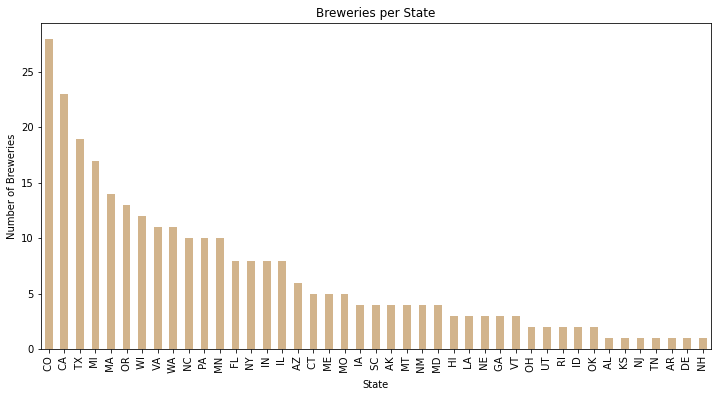

In [33]:
# Create a bar chart based off of the group series from before
brew_count = merge_df.plot(kind='bar', title="Breweries per State", color='tan', figsize=(12,6))

# Set the xlabel and ylabel using class methods
brew_count.set_xlabel("State")
brew_count.set_ylabel("Number of Breweries")


# plt.show()
# plt.tight_layout()
plt.ioff()

### Top Cities for Breweries